# Image processing lab 
## Session 1: Initiation

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### I. Image formats

#### 1. Reading the image

In [11]:
img = cv2.imread('dataset/image2.jpg')

#### 2. Displaying the image
As `cv2.imshow` causes jupyter notebooks to crash, I've decided to `matplotlib.pyplot.imshow` to display the images.
In order to do so, we should be aware that images in openCV are stored in BGR format by default (as opposed to other libraries, which use the RGB format)

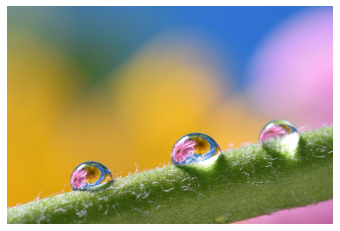

(611, 916, 3)

In [12]:
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()
img.shape

#### 3. RGB Format
This is a color model display format that uses the three primary colors (blue, red and green) to create an image. Each color can have up to 255 gradations. Concretely, an image is a matrix with depth of 3 containing the values for each color.

#### 4. HSL/HSV Format

From [Wikipedia](https://en.wikipedia.org/wiki/HSL_and_HSV):
> HSL (for hue, saturation, lightness) and HSV (for hue, saturation, value; also known as HSB, for hue, saturation, brightness) are alternative representations of the RGB color model, designed in the 1970s by computer graphics researchers to more closely align with the way human vision perceives color-making attributes. In these models, colors of each hue are arranged in a radial slice, around a central axis of neutral colors which ranges from black at the bottom to white at the top. 

#### Transforming RGB to HLS

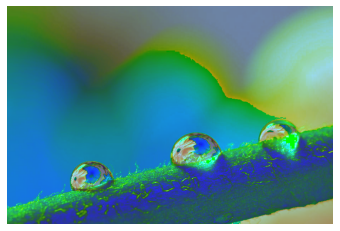

In [13]:
image_hsl = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
plt.axis('off') # hides gridlines
plt.imshow(image_hsl)
plt.show()

#### 5. Grayscale Format
images are treated as two dimensional matrices with values ranging from 0 for darkest to 256 for brightest

#### Transforming RGB to Grayscale
the additional argument **cmap** in `plt.imshow()` is needed to display grayscale images

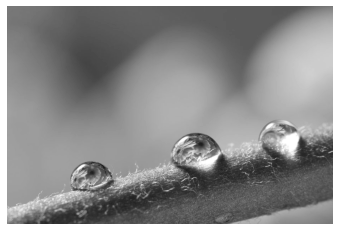

In [14]:
image_gs = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.axis('off') # hides gridlines
plt.imshow(image_gs, cmap='gray') 
plt.show()

#### 6. Binary Format
Images in this format are similar to those in the Grayscale format. With the exception that contain pixel with grayscale values of **either** 0 **or** 256. The choice of whether assigning 0 or 256 to a given pixel is done by comparing to an arbitrary Threshold.

In [15]:
def display_binary_image(image_obj, threshold):
    image_bw = cv2.threshold(image_obj, threshold, 255, cv2.THRESH_BINARY)[1]
    plt.axis('off') # hides gridlines
    plt.imshow(image_bw, cmap='gray') 
    plt.show()

##### For threshold value 110

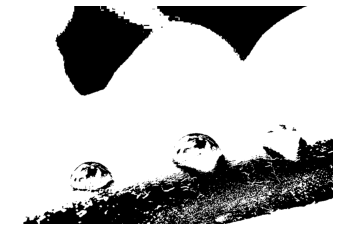

In [16]:
display_binary_image(image_gs, 110)

##### For threshold value 205

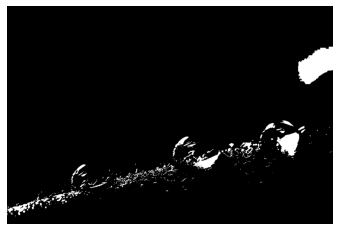

In [17]:
display_binary_image(image_gs, 205)

### II. Image operations

Image processing consists of performing mathematical transformations on images with the aim of improving their quality or extracting information from them. Arithmetic operations between digital images require image size normalization. 

In [18]:
# img is already imported, importing second image
img2 = cv2.imread('dataset/image1.jpg')

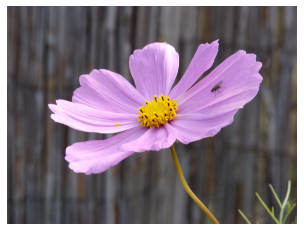

In [19]:
image2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(image2_rgb)
plt.axis('off')
plt.show()

In [20]:
print(f"image 1 size: {img.shape}\nimage 2 size: {img2.shape}")

image 1 size: (611, 916, 3)
image 2 size: (3456, 4608, 3)


#### 1. Resizing the second image

The method `cv2.resize` is used to resize the second image. Note that the resizing should take an image in BGR format as a parameter

In [25]:
# img2 is in BGR format
resizedImgBGR = cv2.resize(img2, img.shape[:2][::-1])

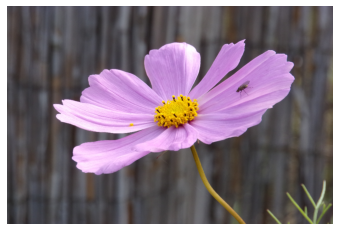

size: (611, 916, 3)


In [27]:
resizedImg = cv2.cvtColor(resizedImgBGR, cv2.COLOR_BGR2RGB)
plt.imshow(resizedImg)
plt.axis('off')
plt.show()
print("size:", resizedImg.shape)

#### 2. Image addition

[uni-wuerzburg.de](https://wuecampus2.uni-wuerzburg.de/moodle/mod/book/view.php?id=958001&chapterid=10068) on image addition:
> The addition of two images stacks the value of every pixel in image A with the corresponding pixel of image B. Consequently, the image gets brighter. Depending on the maximal allowed pixel value that is used, this operation might result in saturated pixels of the new image, i.e. white pixels that have reached the maximum value. This will lead to information loss and should be avoided if possible. The whole resulting image can for example be re-normalized, so that the brightest pixel equals the maximum allowed value and all other pixels are scaled accordingly. The example below is not adjusted for this case.

The following example uses this formula for image addition: 

$$Res(i,j) = 0.5 * A(i,j) + 0.5 * B(i,j)$$

Again, here are the pictures we will be using as an example:

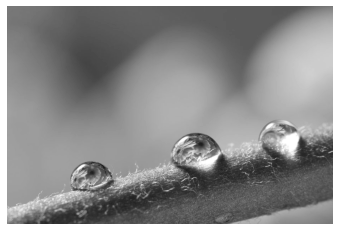

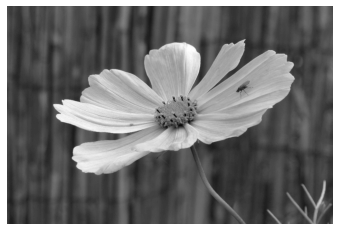

In [28]:
i1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
i2 = cv2.cvtColor(resizedImg, cv2.COLOR_BGR2GRAY)

plt.imshow(i1, cmap='gray')
plt.axis('off')
plt.show()

plt.imshow(i2, cmap='gray')
plt.axis('off')
plt.show()

And here is their sum

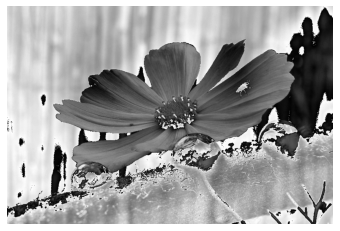

In [29]:
plt.imshow(0.5 * (i1 + i2), cmap='gray')
plt.axis('off')
plt.show()

#### 2. Image substraction

[uni-wuerzburg.de](https://wuecampus2.uni-wuerzburg.de/moodle/mod/book/view.php?id=958001&chapterid=10068) on image substraction:
> Subtracting two images works analogously. In a similar way, the resulting values may lie outside the allowed range of pixel values. This will be the case when one image is subtracted from another with lower pixel values. Here, it is advantageous to add a certain constant value to the equation (the whole image). The example below shows what happens when two images that are in parts almost identical get subtracted from one another. We add the constant value of 150 to every pixel of image A and then perform the subtraction by image B. Subtle differences in the background can be seen as soft lines and shapes in the resulting image. This is expected for nearly identical images with e.g. slightly different exposure times. The darker areas of the cup in the middle even become a bit darker (value 0) since they (very dark tones plus 150) are then indeed over-subtracted. The gray lines across the cup are the result of the subtraction of a light tone (dark cup in image A + 150) with a dark tone (dark lines in image B). The cup on the right side in the resulting image also features gray lines, which are brighter compared to the cup in the middle since the cup is brighter itself.

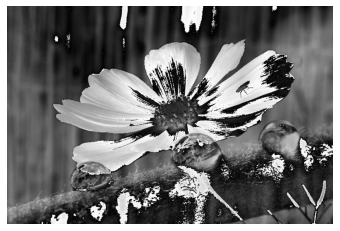

In [30]:
plt.imshow(i1 - i2, cmap='gray')
plt.axis('off')
plt.show()

#### 3. Scalar multiplication

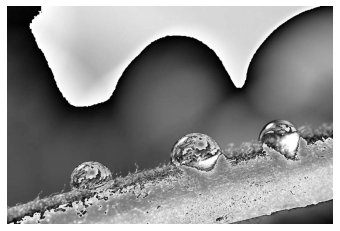

In [31]:
cst = 2
plt.imshow(i1 * cst, cmap='gray')
plt.axis('off')
plt.show()

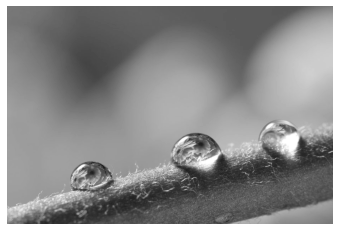

In [32]:
cst = 0.1
plt.imshow(i1 * cst, cmap='gray')
plt.axis('off')
plt.show()

### III. Improving image quality with Histogram equalization

#### 1. Histograms

[From the OpenCV documentation:](https://docs.opencv.org/3.4/d1/db7/tutorial_py_histogram_begins.html)
>So what is histogram ? You can consider histogram as a graph or plot, which gives you an overall idea about the intensity distribution of an image. It is a plot with pixel values (ranging from 0 to 255, not always) in X-axis and corresponding number of pixels in the image on Y-axis.

>It is just another way of understanding the image. By looking at the histogram of an image, you get intuition about contrast, brightness, intensity distribution etc of that image. Almost all image processing tools today, provides features on histogram.

![Histogram sample](https://docs.opencv.org/3.4/histogram_sample.jpg)

> You can see the image and its histogram. (Remember, this histogram is drawn for grayscale image, not color image). Left region of histogram shows the amount of darker pixels in image and right region shows the amount of brighter pixels. From the histogram, you can see dark region is more than brighter region, and amount of midtones (pixel values in mid-range, say around 127) are very less.

In [33]:
img3 = cv2.imread('dataset/image3.jpeg')

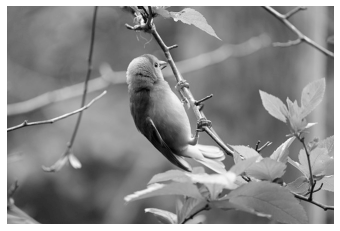

(611, 916, 3)

In [43]:
image3_gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
plt.imshow(image_rgb, cmap='gray')
plt.axis('off')
plt.show()
img.shape

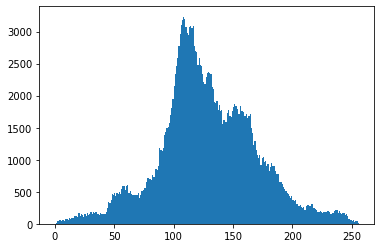

In [44]:
plt.hist(image3_gray.ravel(),256,[0,256])
plt.show()

Displaying Histogram for a Black and white picture

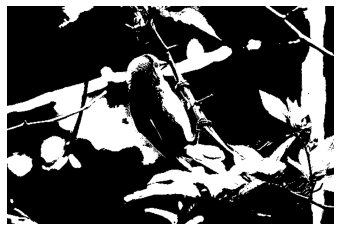

In [46]:
threshold = 150
display_binary_image(cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY), threshold)

Obviously, the histogram only contains two non null values: 0 and 255

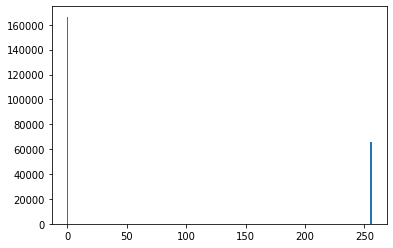

In [50]:
image_bw = cv2.threshold(image3_gray, threshold, 255, cv2.THRESH_BINARY)[1]
plt.hist(image_bw.ravel(),256,[0,256])
plt.show()

#### 2. Histogram equalization

[From the OpenCV documentation:](https://docs.opencv.org/4.x/d4/d1b/tutorial_histogram_equalization.html)

>    It is a method that improves the contrast in an image, in order to stretch out the intensity range (see also the corresponding [Wikipedia entry](https://en.wikipedia.org/wiki/Histogram_equalization)).

> To make it clearer, from the image, you can see that the pixels seem clustered around the middle of the available range of intensities. What Histogram Equalization does is to stretch out this range. Take a look at the figure below: The green circles indicate the underpopulated intensities. After applying the equalization, we get an histogram like the figure in the center. The resulting image is shown in the picture at right.

![Histogram equalization example](https://docs.opencv.org/4.x/Histogram_Equalization_Theory_1.jpg)

In [58]:
chef = cv2.imread('dataset/chef.jpg', 0)

##### Before equalization

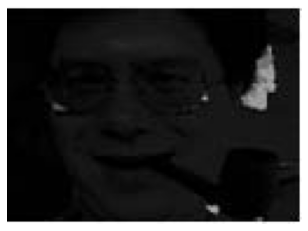

(611, 916, 3)

In [59]:
plt.imshow(chef, cmap='gray')
plt.axis('off')
plt.show()
img.shape

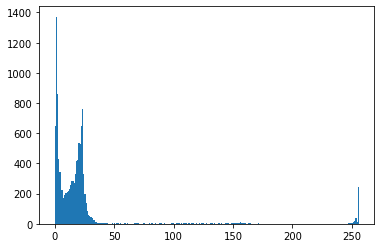

In [60]:
plt.hist(chef.ravel(),256,[0,256])
plt.show()

##### After equalization

In [61]:
# Equalization
chef_equalized = cv2.equalizeHist(chef)

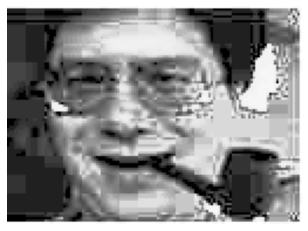

(611, 916, 3)

In [62]:
plt.imshow(chef_equalized, cmap='gray')
plt.axis('off')
plt.show()
img.shape

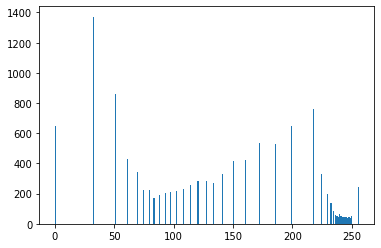

In [63]:
plt.hist(chef_equalized.ravel(),256,[0,256])
plt.show()